# Breast Cancer Classification Project
\<Insert introduction here\>

Below are documentations to some libraries that we will use. While I will try to make it clear how each function we need from them works, I highly recommend you go and look them up yourself as reading documentations is an important skill in learning coding!

NumPy: https://numpy.org/doc/stable/

Pandas: https://pandas.pydata.org/pandas-docs/stable/

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Read data
(We've done this for you, nothing to edit here)

First, we want to read the train and test datasets (.csv files provided with the starter code).
If interested, you can read more about the dataset at [this website]( https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
and [this PDF](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.56.707&rep=rep1&type=pdf) describes how it was created.

The important things to know about the source data format are that the first column contains IDs of entries, the last column contains classifications where 2 means benign and 4 means maligant, and everything in between are values of features.

The `read_csv()` function in pandas reads a csv file into a [dataframe](
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), and `.to_numpy()` converts it to a NumPy array.

In [2]:
train = pd.read_csv('train_data.csv').to_numpy()
test = pd.read_csv('test_data.csv').to_numpy()

In [4]:
CLASSIFICATION_INDEX = -1
MALIGNANT = 4
BENIGN = 2

Display the arrays below to get a better idea of how they look like! (You can choose to only display the first few rows as they are huge)

In [5]:
train[:5]

array([[1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1,       2],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1,       2],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1,       2],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1,       2],
       [1017122,       8,      10,      10,       8,       7,      10,
              9,       7,       1,       4]])

In [6]:
test[:5]

array([[667204,      7,      8,      7,      6,      4,      3,      8,
             8,      4,      4],
       [673637,      3,      1,      1,      1,      2,      5,      5,
             1,      1,      2],
       [684955,      2,      1,      1,      1,      3,      1,      2,
             1,      1,      2],
       [688033,      1,      1,      1,      1,      2,      1,      1,
             1,      1,      2],
       [691628,      8,      6,      4,     10,     10,      1,      3,
             5,      1,      4]])

### Step 2: Calculate Distance between two data entries
Write a function that accepts two data entries (1-D array that is a row from the 2D arrays we have) and returns the distance between them using the formula $$\sqrt{\sum_i{(a_i - b_i)^2}}$$ where a_i and b_i are the i-th element of a and b respectively.

What you need to do is
- for each feature, calculate the differences between the two entries
- square the differences
- sum up all squared differences
- return the square root of the sum

Remember to discard the first and last elements (ID and classification).

You may want to use `np.sqrt(array)` and `np.sum(array)` to sum elements and find squareroots.

In [7]:
def calculateDistance(first, second):
    first = first[1:-1]
    second = second[1:-1]
    squared_differences = np.array([(first[i] - second[i])**2 for i in range(len(first))])
    return(np.sqrt(np.sum(squared_differences)))

Now run the cell below. If you implemented the function correctly, the output should be 
```
11.313708498984761
10.198039027185569 
4.358898943540674 
```

In [8]:
print(calculateDistance(train[0], train[1]))
print(calculateDistance(train[12], train[14]))
print(calculateDistance(train[7], train[29]))

11.313708498984761
10.198039027185569
4.358898943540674


### Step 3: Calculate distance between ALL data entries
First, write a function that accepts one data entry and a list of entries (the `train` matrix we have) and returns an NumPy array containing distance from the one entry to all entries in the list of entries.

Note: For this one project, the code can work if you simply access `train` instead of passing it as an argument, but we want the function to be reusable.

In [25]:
def getAllDistancesFrom(entry, train_data):
    distances = np.array([calculateDistance(entry, train) for train in train_data])
    return(distances)

Test your function! Code below should output
```
array([ 0.        , 11.3137085 , 11.22497216, 11.40175425, 12.28820573,
        8.71779789, 12.04159458, 13.03840481, 11.74734012, 12.9614814 ])
```

In [29]:
getAllDistancesFrom(train[0], train)[:10]

array([ 0.        , 11.3137085 , 11.22497216, 11.40175425, 12.28820573,
        8.71779789, 12.04159458, 13.03840481, 11.74734012, 12.9614814 ])

Now step up from the previous function that calculates all distance pairs and store them in a 2D array. \
For example, row 0 of the output should contain result from `getAllDistances(train[0], train)`, row 1 should contain  `getAllDistances(train[1], train)`, and so on.

In [27]:
def getAllDistances(train_data):
    distances = np.array([getAllDistancesFrom(entry, train_data) for entry in train_data])
    return distances

Run this grapher to visualize pairwise distances

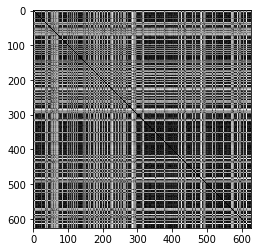

In [31]:
dists = getAllDistances(train)
plt.imshow(dists,cmap='gray', interpolation='none')
plt.show()

### Step 4: Find K nearest neighbors
Write a function that accepts a data entry and finds its k nearest neighbors. It should return an array containing their indicies (not the distance themselves, and not ID number!).

First step would be creating an array `distances` containing the distance from the entry to all other entries. After that, find the k smallest elements in `distances`.

Hint: Using [numpy.argpartition](https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html) can make things a lot easier

In [34]:
def getKNearestNeighbors(entry, dists, k):
    distances = np.array([calculateDistance(entry, train) for train in train_data])
    return np.argpartition(distances, k)[:k]

Again, test your function!

In [14]:
#TODO: Write test case

In [35]:
getKNearestNeighbors(train[0], train, 5)

626


array([  0, 110, 178, 145, 154])

### Step 5: Classify!
Given the neighbors of an data entry, count how many of them are benign and malignant, and classify based on that.

In [16]:
def classify(train_data, neighbors_indices):
    num_malignant = 0
    for i in neighbors_indices:
        if train_data[i][CLASSIFICATION_INDEX] == MALIGNANT:
            num_malignant += 1
    if num_malignant > neighbors_indices.size/2:
        return MALIGNANT
    else:
        return BENIGN

Does your classification function work on test data?

(Again, we've done this for you. Nothing to edit here)

In [17]:
num_correct = 0
for entry in test:
    neighbors = getKNearestNeighbors(entry, train, 5)
    if classify(train, neighbors) == entry[CLASSIFICATION_INDEX]:
        num_correct += 1
accuracy = num_correct/len(test)
print('Classification accuracy: ' + str(accuracy))

Classification accuracy: 0.9428571428571428
